In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
from citipy import citipy

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e34fbbc4e087e3dd94d997a8c45286f4


In [39]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [40]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
     
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    
   
       





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ayan
Processing Record 2 of Set 13 | lebu
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | manokwari
Processing Record 6 of Set 13 | east london
Processing Record 7 of Set 13 | vaini
Processing Record 8 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 13 | elko
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | tulun
Processing Record 12 of Set 13 | flin flon
Processing Record 13 of Set 13 | oktyabrskoye
Processing Record 14 of Set 13 | ugoofaaru
Processing Record 15 of Set 13 | qaanaaq
Processing Record 16 of Set 13 | victoria
Processing Record 17 of Set 13 | marcona
City not found. Skipping...
Processing Record 18 of Set 13 | nanortalik
Processing Record 19 of Set 13 | skalistyy
City not found. Skipping...
Processing Record 20 of Set 13 | georgetown
Processing Record 21 of Set 13

Processing Record 37 of Set 16 | korla
Processing Record 38 of Set 16 | sept-iles
Processing Record 39 of Set 16 | hovd
Processing Record 40 of Set 16 | port hardy
Processing Record 41 of Set 16 | gayeri
Processing Record 42 of Set 16 | vega de alatorre
Processing Record 43 of Set 16 | port lincoln
Processing Record 44 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 16 | porto santo
Processing Record 46 of Set 16 | ayorou
Processing Record 47 of Set 16 | port keats
Processing Record 48 of Set 16 | boyolangu
Processing Record 49 of Set 16 | qinhuangdao
Processing Record 50 of Set 16 | hermanus
Processing Record 1 of Set 17 | luganville
Processing Record 2 of Set 17 | grand gaube
Processing Record 3 of Set 17 | monrovia
Processing Record 4 of Set 17 | laranjeiras do sul
Processing Record 5 of Set 17 | dryden
Processing Record 6 of Set 17 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 17 | beyneu
Processing Record 8 of Set 17 | ostrovnoy
P

Processing Record 20 of Set 20 | izoplit
Processing Record 21 of Set 20 | beringovskiy
Processing Record 22 of Set 20 | migori
Processing Record 23 of Set 20 | varhaug
Processing Record 24 of Set 20 | lenine
Processing Record 25 of Set 20 | tateyama
Processing Record 26 of Set 20 | ayagoz
Processing Record 27 of Set 20 | caxias
Processing Record 28 of Set 20 | iralaya
Processing Record 29 of Set 20 | isangel
Processing Record 30 of Set 20 | harlingen
Processing Record 31 of Set 20 | rochelle
Processing Record 32 of Set 20 | tadine
Processing Record 33 of Set 20 | mrirt
City not found. Skipping...
Processing Record 34 of Set 20 | westpunt
City not found. Skipping...
Processing Record 35 of Set 20 | klaksvik
Processing Record 36 of Set 20 | moanda
Processing Record 37 of Set 20 | san carlos de bariloche
Processing Record 38 of Set 20 | tucuma
Processing Record 39 of Set 20 | villarrica
Processing Record 40 of Set 20 | oussouye
Processing Record 41 of Set 20 | hualmay
Processing Record 42

Processing Record 6 of Set 24 | maltahohe
Processing Record 7 of Set 24 | cervo
Processing Record 8 of Set 24 | saleaula
City not found. Skipping...
Processing Record 9 of Set 24 | ahipara
Processing Record 10 of Set 24 | niono
Processing Record 11 of Set 24 | royan
Processing Record 12 of Set 24 | semporna
Processing Record 13 of Set 24 | satitoa
City not found. Skipping...
Processing Record 14 of Set 24 | amderma
City not found. Skipping...
Processing Record 15 of Set 24 | comodoro rivadavia
Processing Record 16 of Set 24 | joaima
Processing Record 17 of Set 24 | hambantota
Processing Record 18 of Set 24 | micheweni
Processing Record 19 of Set 24 | garowe
Processing Record 20 of Set 24 | flinders
Processing Record 21 of Set 24 | tabriz
Processing Record 22 of Set 24 | murray bridge
Processing Record 23 of Set 24 | umea
Processing Record 24 of Set 24 | awbari
Processing Record 25 of Set 24 | nishihara
Processing Record 26 of Set 24 | udaipura
Processing Record 27 of Set 24 | sistranda

In [42]:
len(cities)

619

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayan,56.45,138.17,-17.97,78,3,10.89,RU,2020-12-24 00:43:15
1,Lebu,-37.62,-73.65,56.41,89,0,13.60,CL,2020-12-24 00:43:15
2,Hilo,19.73,-155.09,82.40,54,1,11.41,US,2020-12-24 00:42:10
3,Jamestown,42.10,-79.24,41.00,55,1,12.75,US,2020-12-24 00:39:35
4,Manokwari,-0.87,134.08,83.98,70,100,3.58,ID,2020-12-24 00:43:16
5,East London,-33.02,27.91,70.50,65,36,16.71,ZA,2020-12-24 00:43:16
6,Vaini,-21.20,-175.20,84.20,79,40,16.11,TO,2020-12-24 00:43:16
7,Elko,41.00,-115.50,30.20,42,1,3.36,US,2020-12-24 00:43:16
8,Ushuaia,-54.80,-68.30,46.40,81,40,29.97,AR,2020-12-24 00:43:17
9,Tulun,54.56,100.58,-1.66,91,100,5.99,RU,2020-12-24 00:43:17


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayan,RU,2020-12-24 00:43:15,56.45,138.17,-17.97,78,3,10.89
1,Lebu,CL,2020-12-24 00:43:15,-37.62,-73.65,56.41,89,0,13.60
2,Hilo,US,2020-12-24 00:42:10,19.73,-155.09,82.40,54,1,11.41
3,Jamestown,US,2020-12-24 00:39:35,42.10,-79.24,41.00,55,1,12.75
4,Manokwari,ID,2020-12-24 00:43:16,-0.87,134.08,83.98,70,100,3.58
...,...,...,...,...,...,...,...,...,...
564,Sesheke,ZM,2020-12-24 00:43:30,-17.48,24.30,69.19,89,95,2.15
565,Kuusamo,FI,2020-12-24 00:45:02,65.97,29.18,28.40,100,90,4.70
566,Varnamo,SE,2020-12-24 00:45:02,57.19,14.04,39.00,96,100,1.01
567,Ambovombe,MG,2020-12-24 00:45:03,-25.17,46.08,75.40,70,66,6.62


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

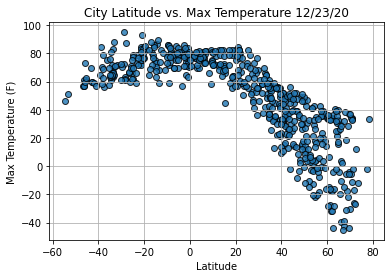

In [47]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

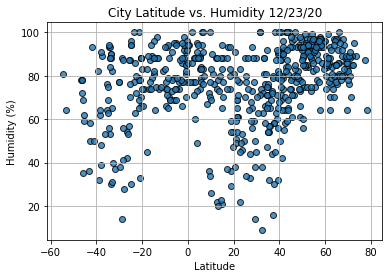

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

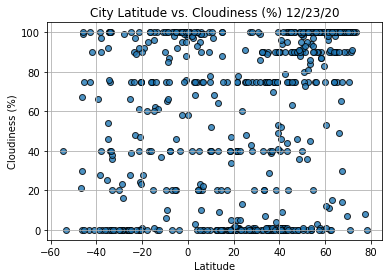

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

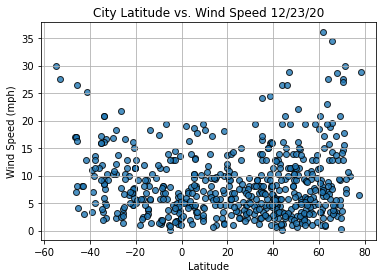

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2020-12-24 00:43:17
Lat                         77.48
Lng                        -69.36
Max Temp                    -2.11
Humidity                       87
Cloudiness                      8
Wind Speed                   6.51
Name: 13, dtype: object

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayan,RU,2020-12-24 00:43:15,56.45,138.17,-17.97,78,3,10.89
2,Hilo,US,2020-12-24 00:42:10,19.73,-155.09,82.40,54,1,11.41
3,Jamestown,US,2020-12-24 00:39:35,42.10,-79.24,41.00,55,1,12.75
7,Elko,US,2020-12-24 00:43:16,41.00,-115.50,30.20,42,1,3.36
9,Tulun,RU,2020-12-24 00:43:17,54.56,100.58,-1.66,91,100,5.99


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

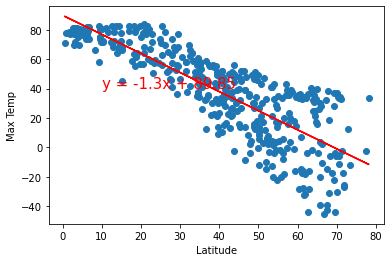

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

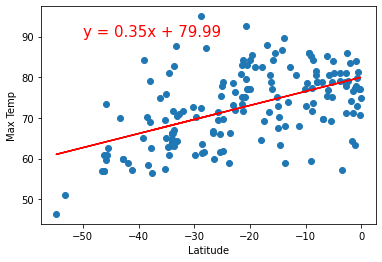

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

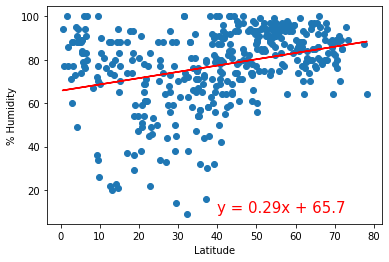

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

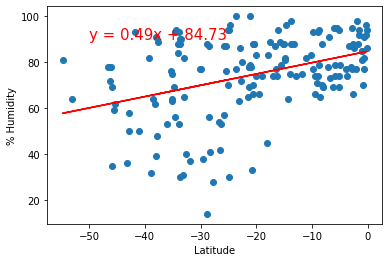

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,90))

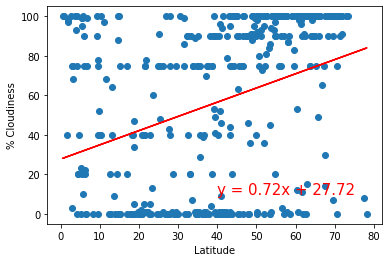

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

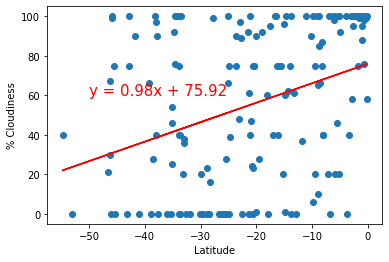

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

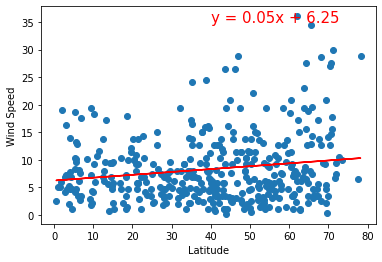

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

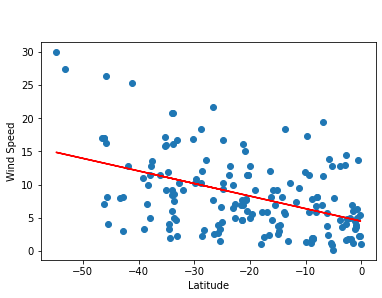

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))